In [432]:
# dataset file name
datasetFileName = "dataset.npz"


In [433]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

print(tf.__version__)


2.9.1


In [434]:
# version prefix
versionPrefix = f"{tf.__version__.replace('.','_')}"

versionPrefix


'2_9_1'

In [435]:
import numpy as np
# from sklearn.model_selection import train_test_split

# datasetFileName = "dataset.npz"

with np.load(datasetFileName) as data:
    dataImages = data['images']
    dataLabels = data['labels']

classNames = ['Clean', 'Contaminated']


In [436]:
print(dataImages.shape)
dataImages.dtype


(250, 82, 79, 3)


dtype('uint8')

In [437]:
# dataShape = (len(dataImages),)+dataImages[0].shape
# print(dataShape)


In [438]:
# a = np.empty(dataShape, dtype=np.uint8)

# for i in range(len(dataImages)):
#     a[i] = dataImages[i].astype('uint8')

# dataImages = a

# del a


In [439]:
print(dataLabels.shape)
dataLabels.dtype


(250,)


dtype('int32')

In [440]:
# dataLabels = np.uint8(dataLabels)

# print(dataLabels.shape)
# dataLabels.dtype


In [441]:

# Split the data up in train and test sets
trainImages, testImages, trainLabels, testLabels = train_test_split(
    dataImages, dataLabels, test_size=0.33, random_state=42)


In [442]:
trainImages.shape


(167, 82, 79, 3)

In [443]:
trainImages.dtype


dtype('uint8')

In [444]:
trainImages[0]


array([[[180, 173, 163],
        [177, 170, 160],
        [182, 175, 165],
        ...,
        [183, 176, 166],
        [182, 175, 165],
        [183, 176, 166]],

       [[179, 172, 162],
        [179, 172, 162],
        [181, 174, 164],
        ...,
        [183, 176, 166],
        [183, 176, 166],
        [182, 175, 165]],

       [[181, 174, 164],
        [180, 173, 163],
        [179, 172, 162],
        ...,
        [183, 176, 166],
        [183, 176, 166],
        [182, 175, 165]],

       ...,

       [[191, 188, 173],
        [195, 192, 177],
        [194, 191, 176],
        ...,
        [199, 195, 184],
        [200, 196, 185],
        [200, 196, 185]],

       [[193, 190, 175],
        [194, 191, 176],
        [193, 190, 175],
        ...,
        [199, 195, 183],
        [201, 197, 186],
        [199, 195, 183]],

       [[193, 190, 175],
        [193, 190, 175],
        [193, 190, 175],
        ...,
        [202, 198, 186],
        [203, 199, 187],
        [199, 195, 183]]

In [445]:
len(trainLabels)


167

In [446]:
trainLabels


array([1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0])

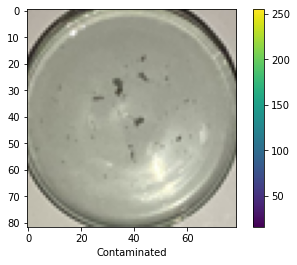

In [447]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(trainImages[0])
plt.xlabel(classNames[trainLabels[0]])
plt.colorbar()
plt.grid(False)
plt.show()


In [448]:
trainImages = trainImages / 255.0

testImages = testImages / 255.0


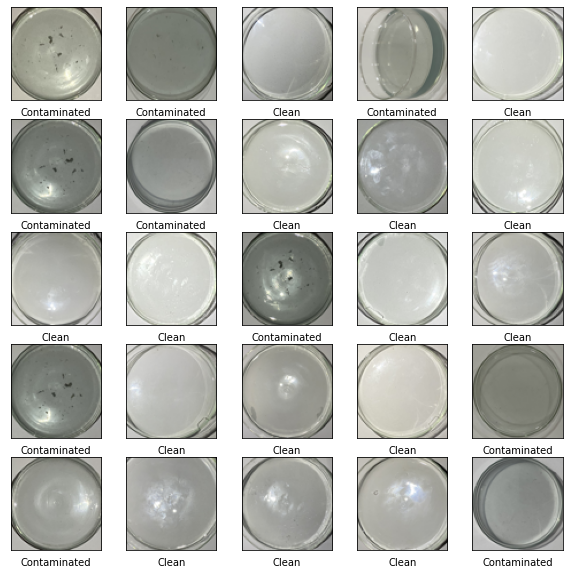

In [449]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainImages[i], cmap=plt.cm.binary)
    plt.xlabel(classNames[trainLabels[i]])
plt.show()


In [450]:
inputShape = trainImages[0].shape
print(inputShape)
outputShape = len(classNames)
print(outputShape)


(82, 79, 3)
2


In [451]:
import tensorflow as tf

model = tf.keras.Sequential([
    # tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Flatten(input_shape=inputShape),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(outputShape)
])
model.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 19434)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               2487680   
                                                                 
 dense_19 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,487,938
Trainable params: 2,487,938
Non-trainable params: 0
_________________________________________________________________


In [452]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(
                  from_logits=True),
              metrics=['accuracy'])


In [453]:
model.fit(trainImages, trainLabels, epochs=10)


Epoch 1/10
6/6 [==============================] - 0s 6ms/step - loss: 4.7751 - accuracy: 0.4790
Epoch 2/10
6/6 [==============================] - 0s 7ms/step - loss: 1.3197 - accuracy: 0.5749
Epoch 3/10
6/6 [==============================] - 0s 6ms/step - loss: 0.6242 - accuracy: 0.6407
Epoch 4/10
6/6 [==============================] - 0s 7ms/step - loss: 0.2539 - accuracy: 0.9281
Epoch 5/10
6/6 [==============================] - 0s 6ms/step - loss: 0.2557 - accuracy: 0.9341
Epoch 6/10
6/6 [==============================] - 0s 7ms/step - loss: 0.1513 - accuracy: 0.9880
Epoch 7/10
6/6 [==============================] - 0s 7ms/step - loss: 0.1554 - accuracy: 0.9820
Epoch 8/10
6/6 [==============================] - 0s 7ms/step - loss: 0.1187 - accuracy: 0.9880
Epoch 9/10
6/6 [==============================] - 0s 7ms/step - loss: 0.1152 - accuracy: 0.9820
Epoch 10/10
6/6 [==============================] - 0s 6ms/step - loss: 0.1094 - accuracy: 0.9940


In [454]:
testLoss, testAcc = model.evaluate(testImages,  testLabels, verbose=2)

print('\nTest accuracy:', testAcc)


3/3 - 0s - loss: 0.1259 - accuracy: 0.9759 - 112ms/epoch - 37ms/step

Test accuracy: 0.9759036302566528


In [455]:
predictions = model.predict(testImages)
predictions[0]


3/3 [==============================] - 0s 4ms/step


array([1.6165987, 4.8680153], dtype=float32)

In [456]:
np.argmax(predictions[0])


1

In [457]:
testLabels[0]


1

In [458]:
probabilityModel = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [459]:
predictions = probabilityModel.predict(testImages)


3/3 [==============================] - 0s 3ms/step


In [460]:
predictions[0]


array([0.03727601, 0.96272403], dtype=float32)

In [461]:
np.argmax(predictions[0])


1

In [462]:
testLabels[0]


1

In [463]:
import matplotlib.pyplot as plt


def plot_image(i, predictionsArray, trueLabels, img):
    trueLabel, img = trueLabels[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predictedLabel = np.argmax(predictionsArray)
    if predictedLabel == trueLabel:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(classNames[predictedLabel],
                                         100*np.max(predictionsArray),
                                         classNames[trueLabel]),
               color=color)


def plot_value_array(i, predictionsArray, trueLabels):
    trueLabel = trueLabels[i]
    plt.grid(False)
    plt.xticks(range(outputShape))
    plt.yticks([])
    thisplot = plt.bar(range(outputShape), predictionsArray, color="#777777")
    plt.ylim([0, 1])
    predictedLabel = np.argmax(predictionsArray)

    thisplot[predictedLabel].set_color('red')
    thisplot[trueLabel].set_color('blue')


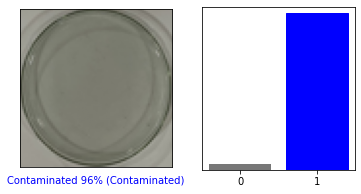

In [464]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()


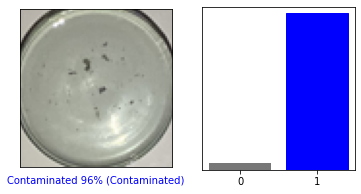

In [465]:
import matplotlib.pyplot as plt

i = 12
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions[i], testLabels, testImages)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions[i],  testLabels)
plt.show()


In [466]:
testLabels[i]


1

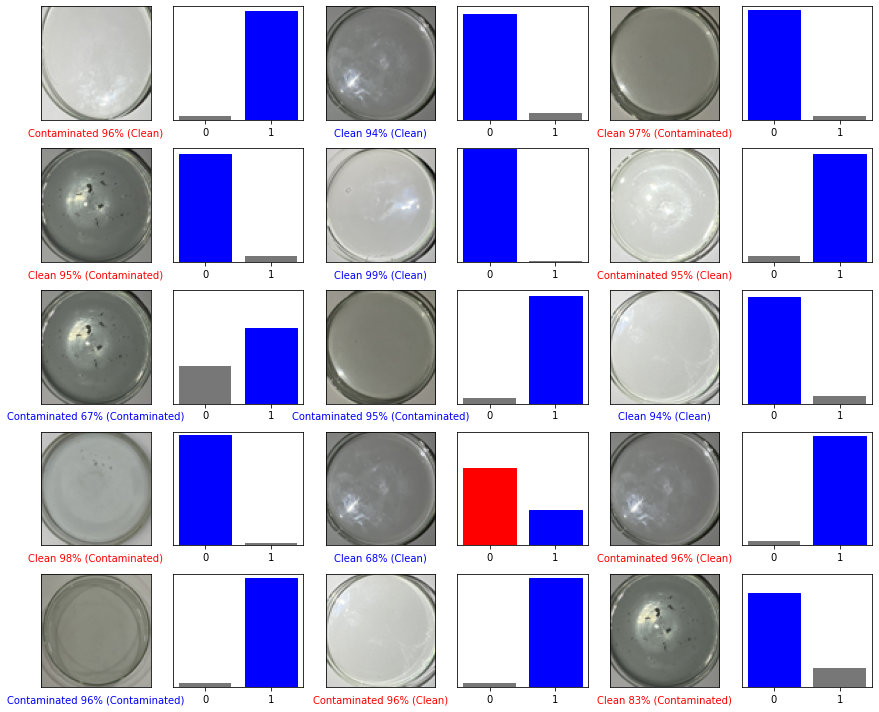

In [467]:
import matplotlib.pyplot as plt

# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
high = testLabels.shape[0]
numRows = 5
numCols = 3
numImages = numRows*numCols

selectedIndex = np.random.randint(0, high, size=numImages)

somePredictions = predictions[selectedIndex]
someImages = testImages[selectedIndex]
someLabels = testLabels[selectedIndex]

plt.figure(figsize=(2*2*numCols, 2*numRows))
for i in range(numImages):
    plt.subplot(numRows, 2*numCols, 2*i+1)
    plot_image(i, predictions[i], someLabels, someImages)
    plt.subplot(numRows, 2*numCols, 2*i+2)
    plot_value_array(i, predictions[i], testLabels)
plt.tight_layout()
plt.show()


In [468]:
# Grab an image from the test dataset.
img = testImages[1]

print(img.shape)


(82, 79, 3)


In [469]:
import numpy as np

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img, 0))

print(img.shape)


(1, 82, 79, 3)


In [470]:
predictionsSingle = probabilityModel.predict(img)

print(predictionsSingle)


1/1 [==============================] - 0s 19ms/step
[[0.9363333  0.06366666]]


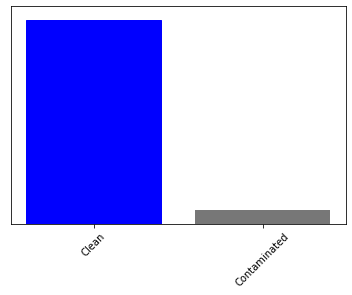

In [471]:
plot_value_array(1, predictionsSingle[0], testLabels)
_ = plt.xticks(range(outputShape), classNames, rotation=45)
plt.show()


In [472]:
np.argmax(predictionsSingle[0])


0

In [473]:
print(testAcc)

version = f'{testAcc*100:.0f}'

print(version)


0.9759036302566528
98


In [474]:
import os

exportPath = ""

if testAcc > 0.95:
    modelDir = 'tf_model'
    version = f"{versionPrefix}_{(testAcc*100):.0f}"

    # for SavedModel format
    exportPath = os.path.join(modelDir, version)
    # save the model
    model.save(exportPath, save_format="tf")

    print('\nexport path = {}'.format(exportPath))

    !dir {exportPath}


INFO:tensorflow:Assets written to: tf_model\2_9_1_98\assets

export path = tf_model\2_9_1_98
 Volume in drive C is Local Disk
 Volume Serial Number is 8697-6595

 Directory of c:\zs\cu\ini\tf_model\2_9_1_98

07/25/2022  05:16 PM    <DIR>          .
07/25/2022  05:12 PM    <DIR>          ..
07/25/2022  04:54 PM    <DIR>          assets
07/25/2022  05:16 PM             7,540 keras_metadata.pb
07/25/2022  05:16 PM            77,204 saved_model.pb
07/25/2022  05:16 PM    <DIR>          variables
               2 File(s)         84,744 bytes
               4 Dir(s)  42,519,506,944 bytes free


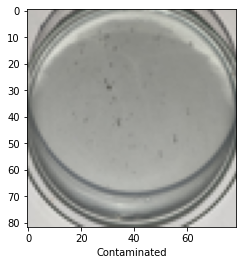

In [475]:
x_img = testImages[5]

plt.imshow(x_img)
plt.xlabel(classNames[testLabels[5]])
plt.show()


In [476]:
# load SavedModel format

newModel = tf.keras.models.load_model(exportPath)

# Check its architecture
newModel.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 19434)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               2487680   
                                                                 
 dense_19 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,487,938
Trainable params: 2,487,938
Non-trainable params: 0
_________________________________________________________________


In [477]:
# Evaluate the restored model
loss, acc = newModel.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModel.predict(testImages)

print(newPredictions.shape)


3/3 - 0s - loss: 0.1259 - accuracy: 0.9759 - 91ms/epoch - 30ms/step
Restored model, accuracy: 97.59%
3/3 [==============================] - 0s 4ms/step
(83, 2)


In [478]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  1
actual:  1


In [479]:
testLabels[0]


1

In [480]:
import json
# create json object

jsonData = json.dumps({"signature_name": "serving_default",
                      "instances": testImages[34].tolist()})


In [481]:
import requests

apiRunning = False

if apiRunning == True:
    headers = {"content-type": "application/json"}
    json_response = requests.post(
        'http://localhost:8501/v1/models/giwa:predict', data=jsonData, headers=headers)

    predictions = json.loads(json_response.text)['predictions']

    pred = [np.argmax(predictions[p]) for p in range(len(predictions))]
    print("Predictions: ", pred)
    print("Actual: ", testLabels[5].tolist())


In [482]:
#  HDF5 format

import os

exportPath = ""

if testAcc > 0.95:
    modelDir = 'tf_model'
    version = f"{versionPrefix}_{(testAcc*100):.0f}"

    # for HDF5 format
    exportPath = os.path.join(modelDir, f"{version}.h5")
    # Save the entire model to a HDF5 file.
    # The '.h5' extension indicates that the model should be saved to HDF5.
    model.save(exportPath)

    !dir {exportPath}


 Volume in drive C is Local Disk
 Volume Serial Number is 8697-6595

 Directory of c:\zs\cu\ini\tf_model

07/25/2022  05:16 PM        29,882,096 2_9_1_98.h5
               1 File(s)     29,882,096 bytes
               0 Dir(s)  42,519,347,200 bytes free


In [483]:

# Recreate the exact same model, including its weights and the optimizer
newModelHF = tf.keras.models.load_model(exportPath)

# Show the model architecture
newModelHF.summary()


Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 19434)             0         
                                                                 
 dense_18 (Dense)            (None, 128)               2487680   
                                                                 
 dense_19 (Dense)            (None, 2)                 258       
                                                                 
Total params: 2,487,938
Trainable params: 2,487,938
Non-trainable params: 0
_________________________________________________________________


In [484]:
# Evaluate the restored model
loss, acc = newModelHF.evaluate(testImages, testLabels, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100 * acc))

newPredictions = newModelHF.predict(testImages)

print(newPredictions.shape)


3/3 - 0s - loss: 0.1259 - accuracy: 0.9759 - 82ms/epoch - 27ms/step
Restored model, accuracy: 97.59%
3/3 [==============================] - 0s 3ms/step
(83, 2)


In [485]:
print("prediction: ", np.argmax(newPredictions[0]))
print("actual: ", testLabels[0])


prediction:  1
actual:  1
